In [1]:
# Parameters
run_id = "1642781791808612"
flow_name = "NBFlow"

# Model Result Dashboard

We retrieve the model results so we can produce model diagnostics.

In [2]:
from metaflow import Step
import pandas as pd
import numpy as np
import altair as alt
step = Step(f'{flow_name}/{run_id}/train')
model_results = step.task.data.model_results
y = model_results['test_labels']
yhat = model_results['test_predictions']

print(f'Results for {run_id=} and {flow_name=}')

Results for run_id='1642781791808612' and flow_name='NBFlow'


## Training History

In [3]:
#TODO
history = model_results['history']
df_history = pd.DataFrame(history)
df_history

,loss,accuracy,val_loss,val_accuracy
0,0.563679,0.69930,0.389234,0.8436
1,0.469560,0.77030,0.421540,0.8018
2,0.491390,0.76835,0.660313,0.8472
3,0.428175,0.82220,0.669486,0.8418


In [4]:
train_df = df_history[['loss', 'accuracy']].copy()
train_df.loc[:,'partition'] = 'training'

val_df = df_history[['val_loss', 'val_accuracy']].rename(columns={'val_loss':'loss', 'val_accuracy':'accuracy'})
val_df.loc[:, 'partition'] = 'validation'

chart_data = pd.concat([train_df, val_df]).reset_index().rename(columns={'index':'epoch'})

loss = alt.Chart(chart_data).mark_line().encode(
    alt.X('epoch:O'),
    alt.Y('loss:Q'),
    color='partition:N',
    tooltip=['loss', 'partition']
).properties(
    width=400,
    title='Learning Curve: Binary Crossentropy Loss'
).interactive()

accuracy = alt.Chart(chart_data).mark_line().encode(
    alt.X('epoch:O'),
    alt.Y('accuracy:Q', scale=alt.Scale(domain=[.5, 1])),
    color='partition:N',
    tooltip=['accuracy', 'partition']
).properties(
    width=400,
    title='Learning Curve: Accuracy'
).interactive()

loss | accuracy

alt.HConcatChart(...)

## Diagnostics

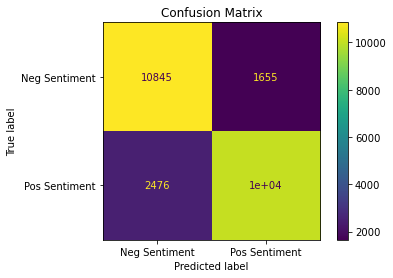

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
cm = ConfusionMatrixDisplay.from_predictions(y, yhat > 0.5, display_labels=['Neg Sentiment', 'Pos Sentiment']).ax_.set_title("Confusion Matrix")


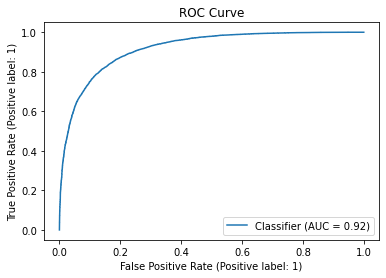

In [6]:
roc = RocCurveDisplay.from_predictions(y, yhat).ax_.set_title("ROC Curve")

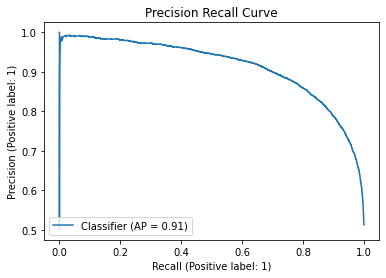

In [7]:
prc = PrecisionRecallDisplay.from_predictions(y, yhat).ax_.set_title("Precision Recall Curve")